In [8]:
from tensorflow import keras
import numpy as np
import sklearn.metrics as sk
import matplotlib.pyplot as plt
import itertools
import os
import environmentsettings

RuntimeError: ML Compute device must be set before initialization.

In [2]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Enter the path to the directory where the pb file is stored
def create_model():
    base_model = keras.applications.DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )

    # Next, we will freeze the base model so that all the learning from the ImageNet 
    # dataset does not get destroyed in the initial training.
    base_model.trainable = False

    # Create inputs with correct shape
    inputs = keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)

    # Add pooling layer or flatten layer
    x =  keras.layers.GlobalAveragePooling2D()(x)

    # Add final dense layer with 6 classes for the 6 types of fruit
    outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

    # Combine inputs and outputs to create model
    model = keras.Model(inputs, outputs)

    # uncomment the following code if you want to see the model
    return model

model = create_model()
model.load_weights('/Volumes/90OL67YGN/saved_models/Adamax_L/21-1.82.h5')

In [5]:
# Enter the path to the validation/test directory

test_directory = environmentsettings.setting_categorical['TRAINING_DIRECTORY']

In [6]:
test_dataset = keras.preprocessing.image_dataset_from_directory(
        test_directory, 
        batch_size= 32,
        image_size=(224, 224), 
        color_mode='rgb',
        label_mode='binary',
        shuffle = False,
        seed = 7,
        validation_split = 0.2,
        subset = 'validation'
    )

Found 21790 files belonging to 2 classes.
Using 4358 files for validation.


In [9]:
# Chex = model.predict(test_dataset, verbose = 1)
combined = model.predict(test_dataset, verbose = 1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-03-14 19:20:38.136263: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-14 19:20:38.136857: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


137/137 [==============================] - 100s 720ms/step


In [10]:
np.round(combined)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [11]:
def test_categorical(y_pred):
    labels = np.array([])
    for x, y in test_dataset:
        # labels = np.concatenate([labels, np.argmax(y.numpy(), axis = -1)])
        print(y)
    # prediction = np.argmax(y_pred, axis = -1)
    # # cm = sk.confusion_matrix(y_true = labels, y_pred = prediction)
    # # return cm
    # acc = sk.classification_report(labels, prediction)
    # return acc

In [12]:
def test_binary(y_pred):
    labels = np.array([])
    for x, y in test_dataset:
        for i in y:
            labels = np.concatenate([labels, i])
    prediction = np.round(y_pred)
    # cm = sk.confusion_matrix(y_true = labels, y_pred = prediction)
    # return cm
    acc = sk.classification_report(labels, prediction)
    return acc

In [13]:
a = test_binary(combined)

/Users/akshatchannashetti/miniforge3/envs/apple_tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshatchannashetti/miniforge3/envs/apple_tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshatchannashetti/miniforge3/envs/apple_tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  

In [14]:
print(a)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.07      0.12      4358

    accuracy                           0.07      4358
   macro avg       0.50      0.03      0.06      4358
weighted avg       1.00      0.07      0.12      4358



In [15]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


TypeError: Image data of dtype <U326 cannot be converted to float

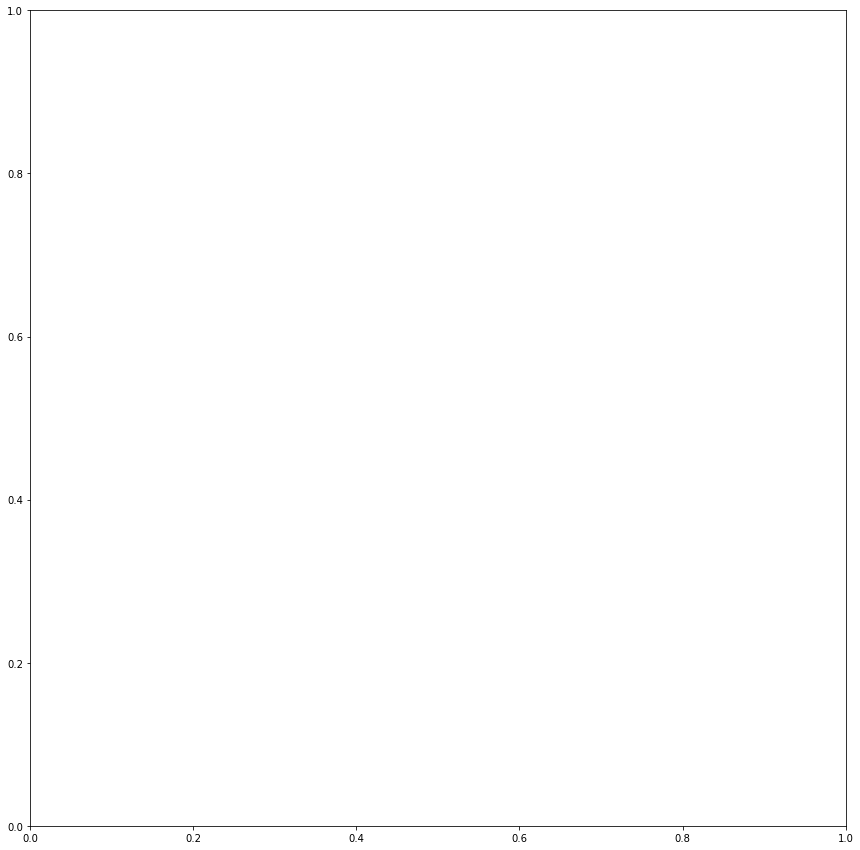

In [17]:
folders = os.listdir(test_directory)
plt.rcParams['figure.figsize'] = [15, 15]
plot_confusion_matrix(a, title = 'Confusion Matrix', classes = folders, normalize = False)